In [1]:
import numpy as np

from board import Board, create_board, random_board, regenerate_apples, NEIGHBOR_KERNEL, initial_position, HarvestEnv

import matplotlib.pyplot as plt

from IPython.display import Video


from celluloid import Camera

In [2]:
env = HarvestEnv(num_agents=9, size=(10, 10))

In [3]:
env.reset()

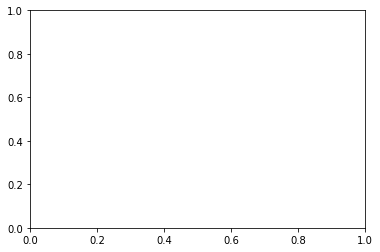

In [9]:
fig, ax = plt.subplots()

In [5]:
env.render(ax)

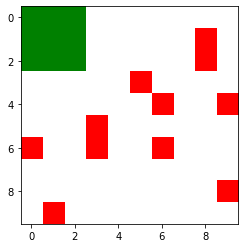

In [6]:
fig

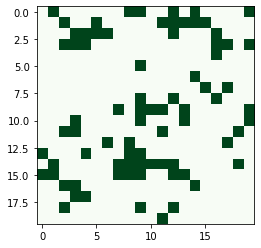

In [78]:
fig, ax = plt.subplots()

camera = Camera(fig)

board = random_board((20, 20), 0.1)
for _ in range(11):
    ax.imshow(board, vmin=0, vmax=1, cmap='Greens')
    camera.snap()
    board = regenerate_apples(board, 0.01)
    

animation = camera.animate()

animation.save("animation.mp4")

In [79]:
Video("animation.mp4")

In [60]:
board = random_board((20, 20), 0.1)

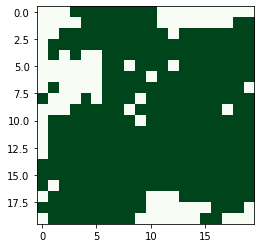

In [67]:
board = regenerate_apples(board, 0.1)
plt.imshow(board, vmin=0, vmax=1, cmap='Greens')
plt.show()

In [7]:
0.1 * np.random.rand(10, 10)

array([[0.05346025, 0.08249531, 0.01512852, 0.08176923, 0.00550234,
        0.04407559, 0.09806409, 0.05878167, 0.09060849, 0.01206607],
       [0.0158822 , 0.00893118, 0.04042852, 0.00599816, 0.0444284 ,
        0.05784193, 0.05302095, 0.01738979, 0.06666245, 0.07683077],
       [0.04694237, 0.08154098, 0.09711544, 0.01663137, 0.04744073,
        0.05361036, 0.03221949, 0.05004793, 0.0593102 , 0.00573539],
       [0.09841503, 0.03173453, 0.09411567, 0.01780424, 0.09079073,
        0.04343235, 0.06469587, 0.05425357, 0.08954677, 0.02628379],
       [0.05514882, 0.05196394, 0.02611674, 0.09141044, 0.07627416,
        0.0809711 , 0.01280258, 0.06424505, 0.00581737, 0.00085114],
       [0.08620917, 0.0237364 , 0.03712565, 0.07909284, 0.03225256,
        0.03330955, 0.0090219 , 0.08514902, 0.07645882, 0.09005822],
       [0.03030128, 0.05998999, 0.04622217, 0.06232796, 0.00513297,
        0.06610781, 0.05489332, 0.01930921, 0.06471113, 0.03380612],
       [0.03429706, 0.08892244, 0.0791349